In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
x = pd.read_csv("./data/x.csv")
y = pd.read_csv("./data/y.csv")

In [14]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [15]:
x = pd.read_csv("./data/x.csv", index_col=0)['0']
y = pd.read_csv("./data/y.csv", index_col=0)['0']
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

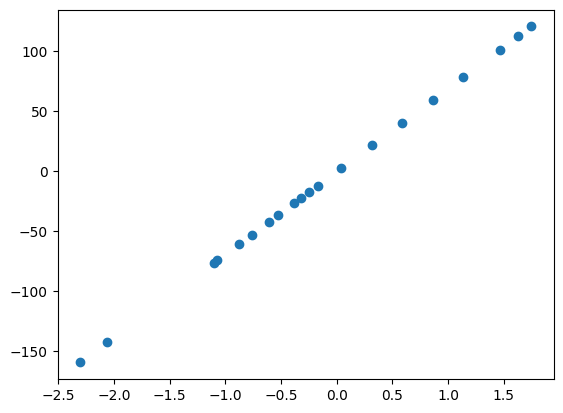

In [16]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [17]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y):
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) / len(X)
        dJ1 = sum((self.predict(X) - Y) * X) / len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [18]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error: ", J)

0
0
initial error:  2937.6446095153406


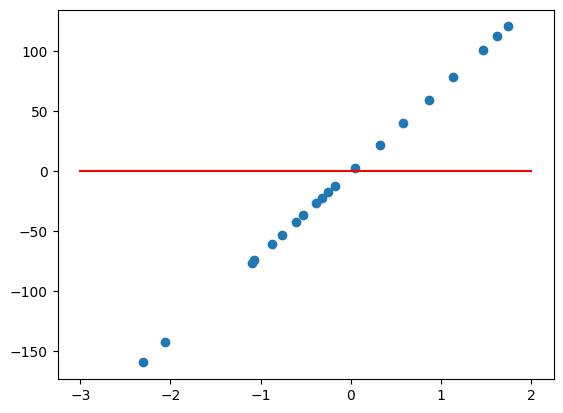

In [19]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [20]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent: ", J)

error after gradient descent:  2253.7456808918546


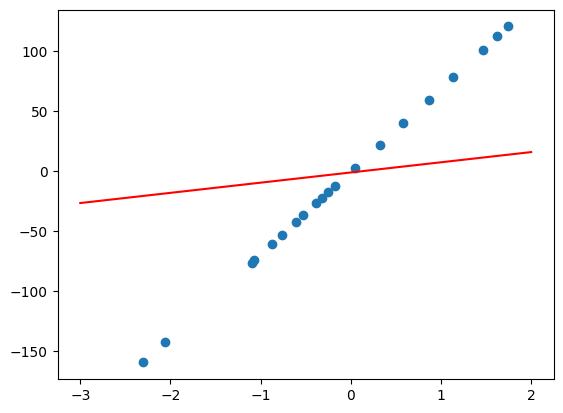

In [21]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [22]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, max_steps=10000):
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors


In [23]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent: ", J)

error after gradient descent:  2.776975306057215e-06


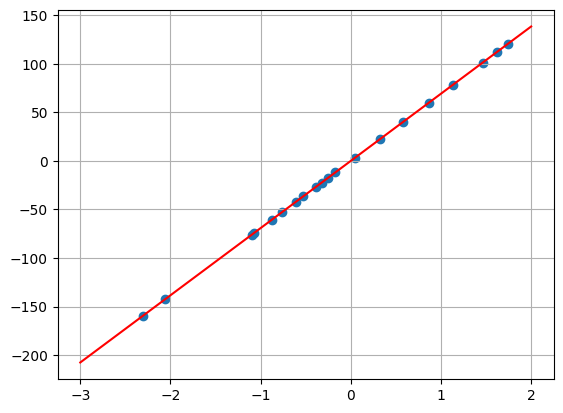

In [24]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.grid()
plt.plot(X0, Y0, 'r')
plt.show()

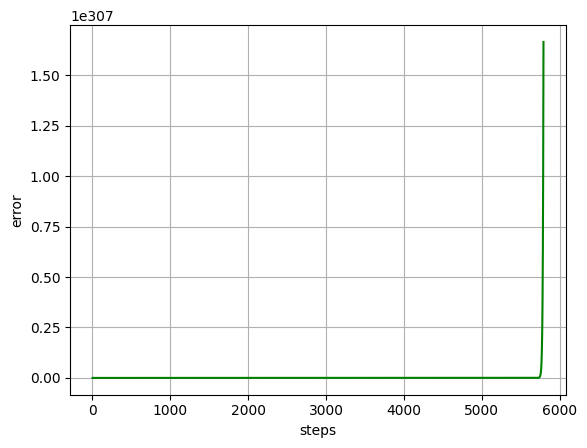

In [65]:
plt.figure()
plt.grid()
plt.xlabel("steps")
plt.ylabel("error")
plt.plot(steps, errors, 'g')
plt.show()

Задания для самостоятельного выполнения

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму. 
- Рассмотрим примеры линейной регрессии при ненулевых парамертах b0 и b1

In [26]:
def set_params(hyp, b0, b1) -> Model:
    hyp.b0 = b0
    hyp.b1 = b1
    return hyp

parameters (b0=1, b1=1); error: 2.5297934237939247e-06
parameters (b0=-12, b1=1); error: 5.1295401922083945e-06
parameters (b0=21, b1=43); error: 2.1927729730675635e-07
parameters (b0=-1, b1=-25); error: 5.384188110350423e-06


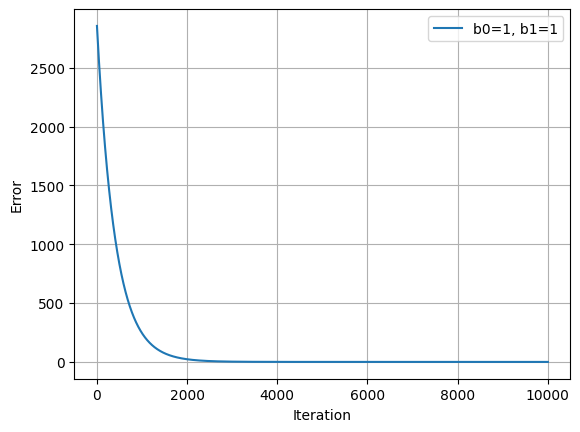

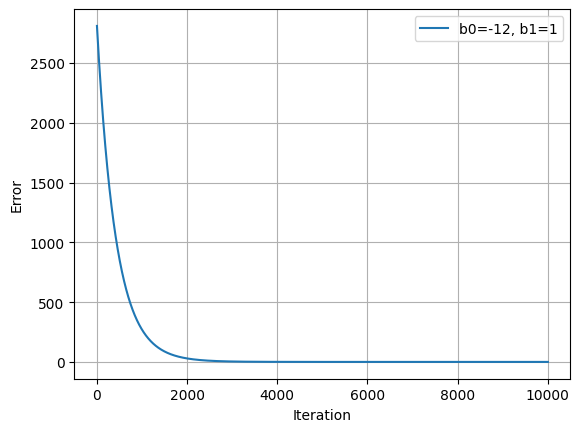

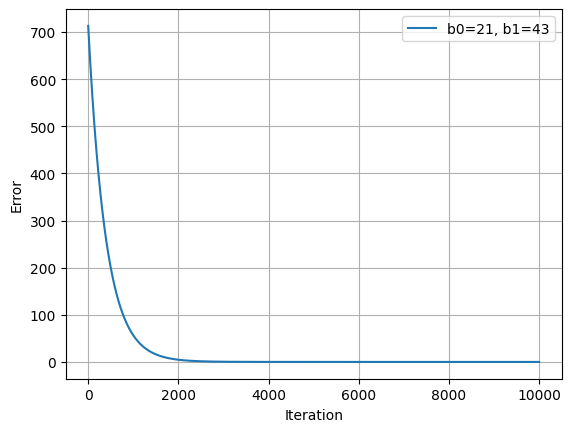

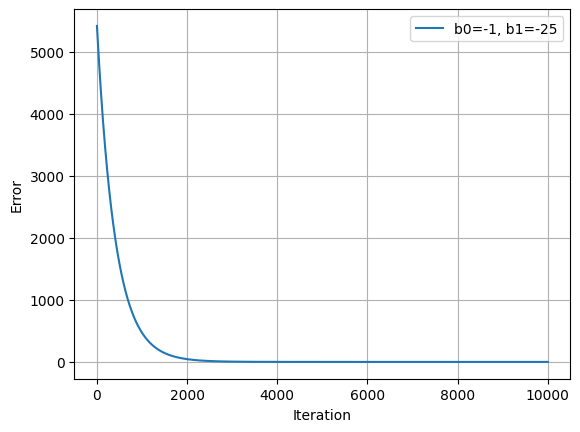

In [27]:
# новые значения парметров b0, b1
new_params = [(1,1), (-12,1), (21,43), (-1, -25)]

for params in new_params:
    b0 = params[0]
    b1 = params[1]
    set_hyp = set_params(hyp, b0, b1)
    steps, errors = set_hyp.fit(x, y)
    print(f"parameters (b0={b0}, b1={b1}); error: {errors[-1]}")

    plt.figure()
    plt.plot(steps, errors, label=f"b0={b0}, b1={b1}")
    plt.grid()
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.legend()
plt.show()
    


2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится. 

alpha param: 0.0001; error: 223.01044927537916
alpha param: 0.001; error: 2.1505771562957605e-06
alpha param: 0.01; error: 2.006036254818294e-25
alpha param: 0.2; error: 3.7794819007204433e-28
alpha param: 0.9; error: 2.532243505759448e-29
alpha param: 1.5; error: 2.1275233487164656e-27
alpha param: 1.6; error: inf


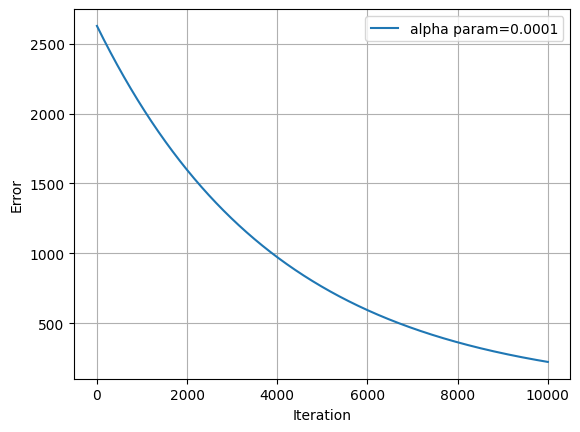

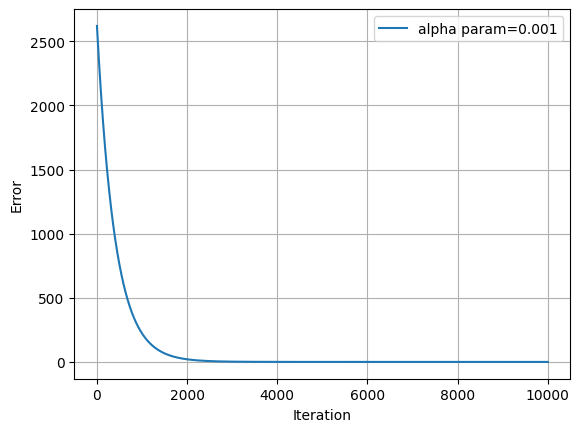

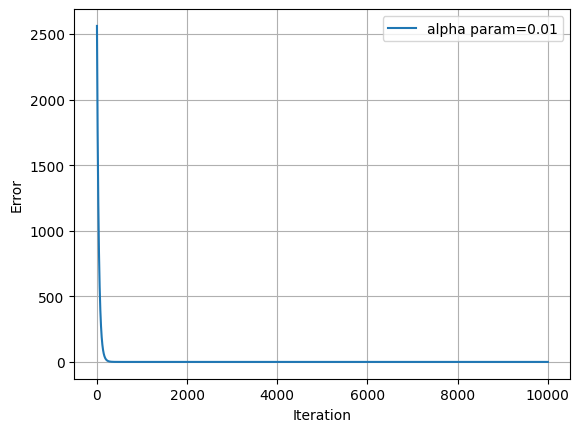

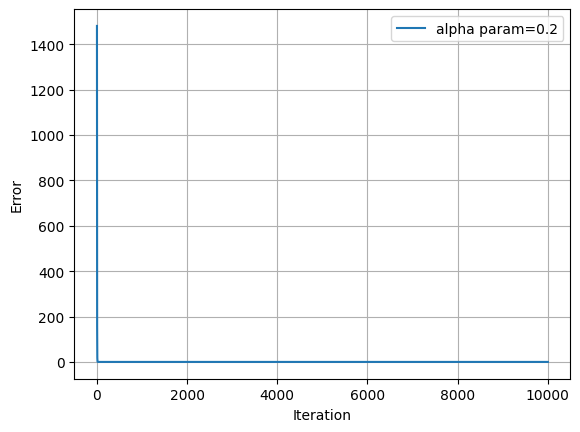

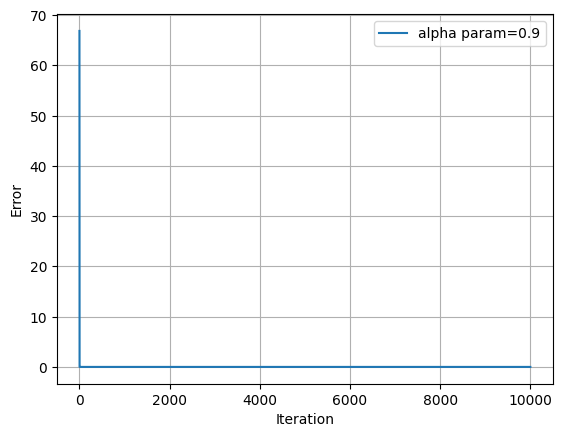

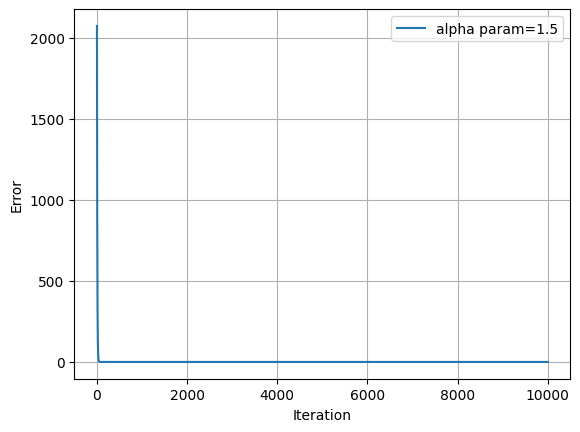

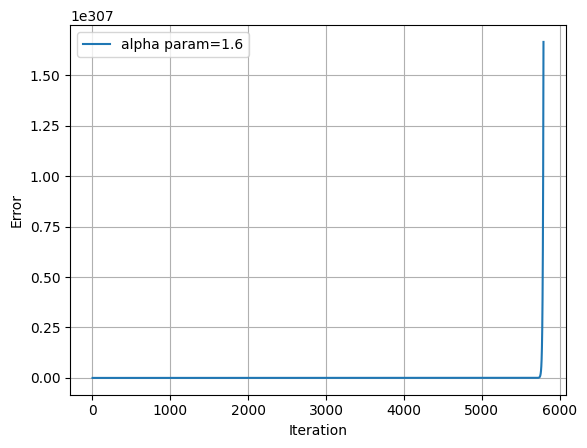

In [28]:
# новые значения параметра alpha
learning_aplpha = [0.0001, 0.001, 0.01, 0.2, 0.9, 1.5, 1.6]

for alpha in learning_aplpha:
    clean_hyp = set_params(hyp, 2, 4)
    steps, errors = clean_hyp.fit(x, y, alpha=alpha)
    print(f"alpha param: {alpha}; error: {errors[-1]}")
    plt.figure()
    plt.plot(steps, errors, label=f"alpha param={alpha}")
    plt.grid()
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.legend()

plt.show()

Из полученных графиков можем наблюдать, что при работе с предоставленными данными увеличение скорости обучени (параметр alpha) больше значения 1.5 влечет за собой всплеск градиента

3. Модифицируйте код модели таким образом, чтобы он корректно работал как с _Series_, так и с _DataFrame_. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [43]:
seriesX = pd.read_csv("./data/x.csv", index_col=0)['0']
seriesY = pd.read_csv("./data/y.csv", index_col=0)['0']
seriesX.head()
dfX = pd.DataFrame(seriesX.values, columns=["val"])
dfY = pd.DataFrame(seriesY.values, columns=["val"])

In [33]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, -1]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, -1]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, max_steps=10000):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, -1]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, -1]
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [41]:
fHYP = Model()
fs, fe = fHYP.fit(seriesX, seriesY)
fJ = fHYP.error(seriesX, seriesY)
print("first model error:", fJ)

first model error: 2.776975306057215e-06


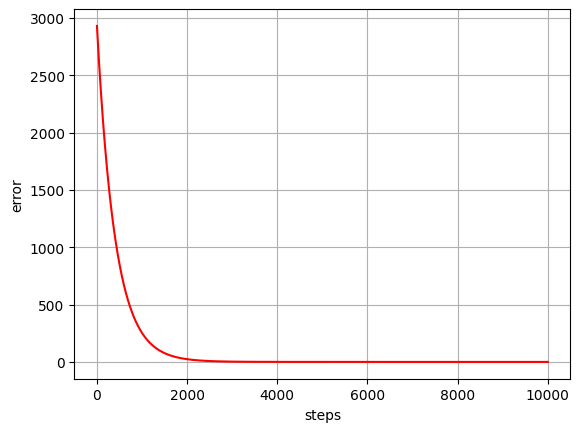

In [64]:
plt.figure()
plt.grid()
plt.xlabel("steps")
plt.ylabel("error")
plt.plot(fs, fe, 'r')
plt.show()

In [44]:
sHYP = Model()
ss, se = sHYP.fit(dfX, dfY)
sJ = fHYP.error(dfX, dfY)
print("second model error:", sJ)

second model error: 2.776975306057215e-06


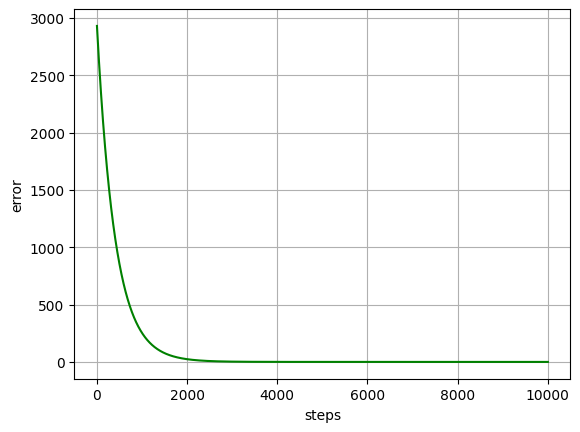

In [63]:
plt.figure()
plt.grid()
plt.xlabel("steps")
plt.ylabel("error")
plt.plot(ss, se, 'g')
plt.show()

4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливался, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [89]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, -1]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, -1]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, max_steps=10000, eps=1e-6):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, -1]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, -1]
        steps, errors = [], []
        step = 0  
        prev_error = self.error(X, Y)
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if abs(new_err - prev_error) < eps:
                break
            prev_error = new_err

        return steps, errors

In [90]:
eps_hyp = Model()
eps_steps, eps_error = eps_hyp.fit(seriesX, seriesY)
eps_J = eps_hyp.error(seriesX, seriesY)
print(f'Error after gradient: {eps_J}; Last epoch: {eps_steps[-1]}')

Error after gradient: 0.0005244076717215663; Last epoch: 7227


Из результата работы функции видим, что работа алгоритма остановилась как только разница ошибок стала меньше 1e-6 и результирующим стало значение ошибки 0.0005244076717215663

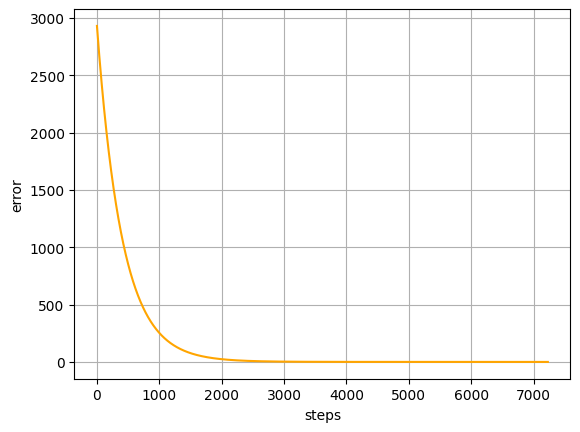

In [91]:
plt.figure()
plt.xlabel("steps")
plt.ylabel("error")
plt.grid()
plt.plot(eps_steps, eps_error, 'orange')
plt.show()

5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов. 

Train 1: Training on params: epochs: 10000, eps: 1e-06;
	Result: Finish at epoch: 7227;
	Last Error: 0.0005244076717215663
Train 2: Training on params: epochs: 15000, eps: 1e-05;
	Result: Finish at epoch: 6037;
	Last Error: 0.005147552503927201
Train 3: Training on params: epochs: 20000, eps: 1e-08;
	Result: Finish at epoch: 9657;
	Last Error: 5.296231499514143e-06
Train 4: Training on params: epochs: 12000, eps: 1e-25;
	Result: Finish at epoch: 12000;
	Last Error: 6.466741642208378e-08


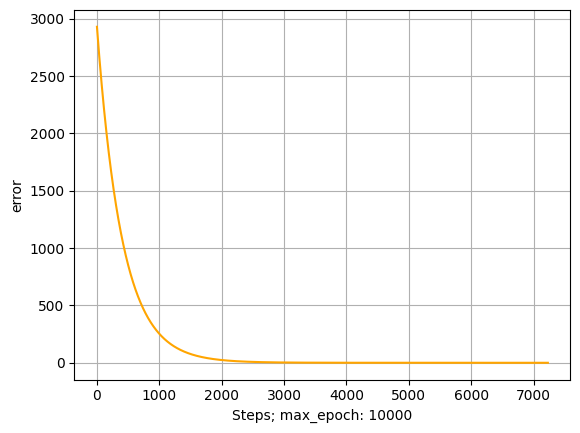

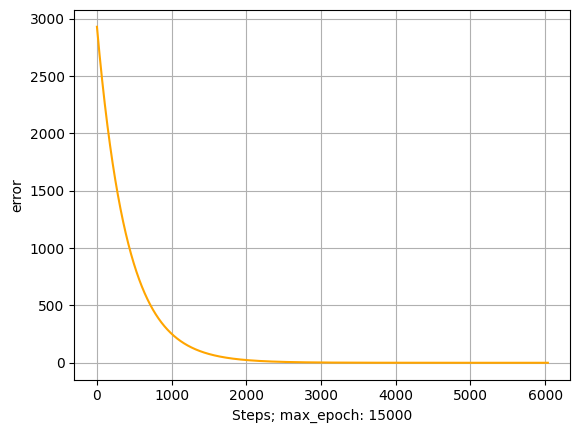

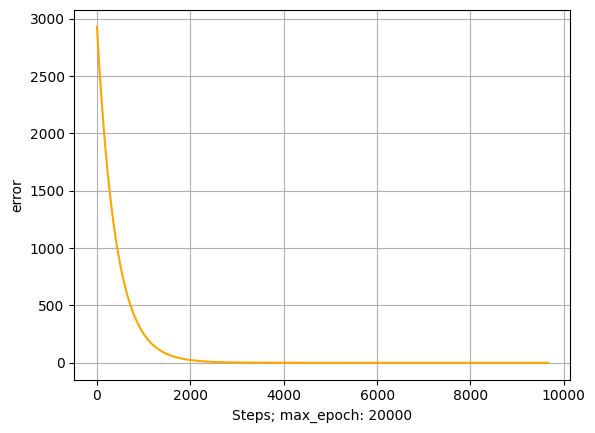

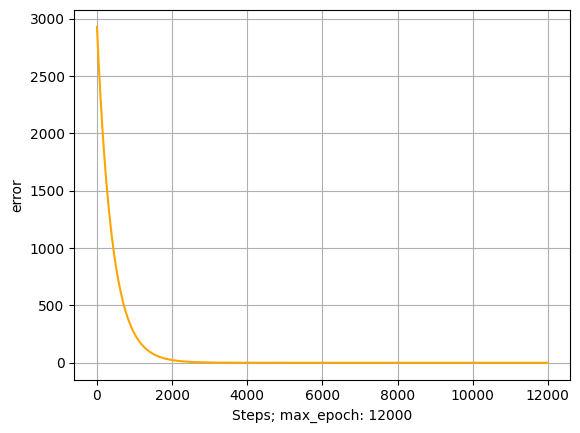

In [92]:
# Проведем обучение на разном количестве итераций и эпсилон

train_pair = [(10_000, 1e-6), (15_000, 1e-5), (20_000, 1e-8), (12_000, 1e-25)]

i = 1
for params in train_pair:
    epochs = params[0]
    eps = params[1]
    new_hyp = Model()
    new_steps, new_errors = new_hyp.fit(seriesX, seriesY, max_steps=epochs, eps=eps)
    new_J = new_hyp.error(seriesX, seriesY)
    print(f'Train {i}: Training on params: epochs: {epochs}, eps: {eps};\n\tResult: Finish at epoch: {new_steps[-1]};\n\tLast Error: {new_errors[-1]}')
    plt.figure()
    plt.xlabel(f'Steps; max_epoch: {epochs}')
    plt.ylabel("error")
    plt.grid()
    plt.plot(new_steps, new_errors, 'orange')
    i += 1
plt.show()
    


6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр _alpha_ можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [152]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, -1]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, -1]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.95, max_steps_in_period=2000, eps=1e-40, periods=7):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, -1]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, -1]
        steps, errors = [], []
        step = 0
        start_alpha = alpha
        make_jump = False
        prev_error = self.error(X, Y)      
        while True:
            for i in range(max_steps_in_period):
                dJ0 = sum(self.predict(X) - Y) /len(X)
                dJ1 = sum((self.predict(X) - Y) * X) /len(X)
                self.b0 -= alpha * dJ0
                self.b1 -= alpha * dJ1    
                new_err = self.error(X, Y)
                step += 1 
                steps.append(step)
                errors.append(new_err)

                if abs(new_err - prev_error) < eps:
                    print(f'Make jump at {periods} period and {i+1} step')
                    make_jump = True
                    periods -= 1
                    prev_error = new_err
                    break

                if new_err > prev_error:
                    alpha = alpha / 2.0
                prev_error = new_err

            if make_jump & (periods > 0):
                alpha = start_alpha
                make_jump = False
                continue
            else:
                break

        return steps, errors

In [153]:
alpha_hyp = Model()
alpha_steps, alpha_errors = alpha_hyp.fit(seriesX, seriesY)
alpha_J = alpha_hyp.error(seriesX, seriesY)
print(f'Error: {alpha_J}; Finished at {alpha_steps[-1]} step')

Make jump at 7 period and 28 step
Make jump at 6 period and 5 step
Make jump at 5 period and 7 step
Make jump at 4 period and 5 step
Make jump at 3 period and 7 step
Make jump at 2 period and 5 step
Make jump at 1 period and 7 step
Error: 2.5894359213879715e-29; Finished at 64 step


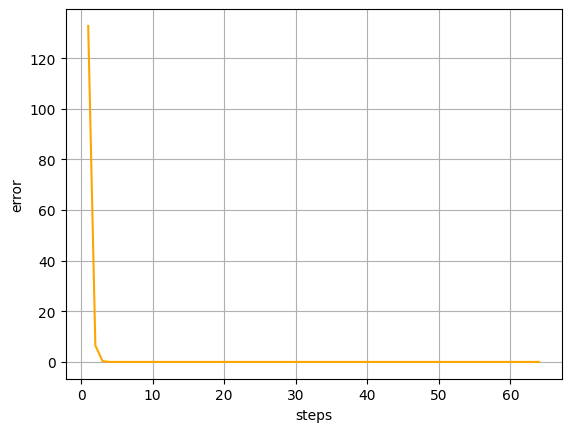

In [154]:
plt.figure()
plt.xlabel("steps")
plt.ylabel("error")
plt.grid()
plt.plot(alpha_steps, alpha_errors, 'orange')
plt.show()

7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [202]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, -1]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, -1]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.95, max_steps_in_period=5000, eps=1e-30, periods=2):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, -1]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, -1]
        steps, errors = [], []
        step = 0
        start_alpha = alpha
        make_jump = False
        prev_error = self.error(X, Y)      
        while True:
            for i in range(max_steps_in_period):
                dJ0 = sum(self.predict(X) - Y) /len(X)
                dJ1 = sum((self.predict(X) - Y) * X) /len(X)
                self.b0 -= alpha * dJ0
                self.b1 -= alpha * dJ1    
                new_err = self.error(X, Y)
                step += 1 
                steps.append(step)
                errors.append(new_err)

                if abs(new_err - prev_error) < eps:
                    print(f'Make jump at {periods} period and {i+1} step')
                    make_jump = True
                    periods -= 1
                    prev_error = new_err
                    break

                if new_err > prev_error:
                    alpha = alpha / 2.0
                prev_error = new_err

            if make_jump & (periods > 0):
                alpha = start_alpha
                make_jump = False
                continue
            else:
                break

        return steps, errors
    
    def plot_regression_graph(self, X, Y):
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, -1]
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, -1]
        plt.figure()
        plt.title("Normalized regression graph")
        plt.xlabel("X")
        plt.ylabel("Y")

        x_min, x_max = np.min(X.values), np.max(X.values)
        y_min, y_max = np.min(Y.values), np.max(Y.values)

        x_norm = (X - x_min) / (x_max - x_min)
        y_norm = (Y - y_min) / (y_max - y_min)
        # предсказали значение на нормализованном X
        y_predicted = self.predict(x_norm)
        
        # нормализуем предсказанные данные
        y_pred_min, y_pred_max = np.min(y_predicted), np.max(y_predicted)
        y_norm_pred = (y_predicted - y_pred_min) / (y_pred_max - y_pred_min)

        plt.scatter(x_norm, y_norm)
        plt.plot(x_norm, y_norm_pred, 'r')
        plt.show()


Make jump at 2 period and 26 step
Make jump at 1 period and 2 step
Error: 2.5879568071906823e-29


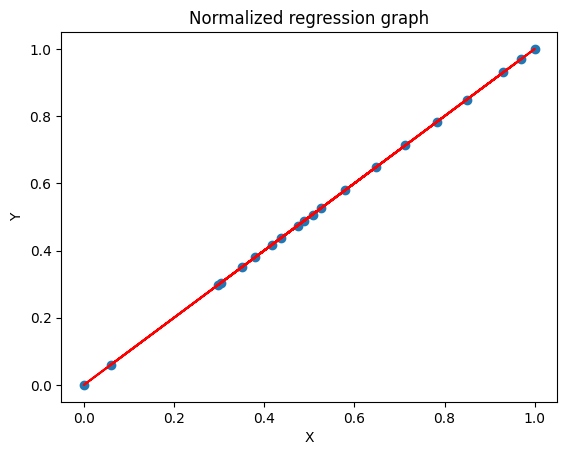

In [203]:
hyp_to_plot = Model()
stps, errs = hyp_to_plot.fit(seriesX, seriesY)
fin_err = hyp_to_plot.error(seriesX, seriesY)
print("Error:", fin_err)
hyp_to_plot.plot_regression_graph(seriesX, seriesY)

Контрольные вопросы

1. **Сформулируйте, в чем состоит задача регрессии, придумайте несколько примеров.**

Задача регрессии - прогноз значения метки на основе набора различных компонентов и характеристик. Значение метки может быть разным и не входить в набор тех значений, которые были предоставлены для прогноза. Алгоритм регрессии моделирует зависимости значений компонентов, чтобы определить закономерность в изменении меток при разных значениях компонентов.

Примеры: 
- прогноз погоды
- прогноз валюты
- прогнозирование продаж в зависитмости от сезона и бюджета на рекламу

2. **Что такое метод градиентного спуска?**

Метод градиентного спуска - численный метод нахождения локального минимума или максимума функции с помощью движения вдоль градиента. В машинном обучении используется для нахождения минимума функции ошибки. Суть метода заключается в итеративной корректировке параметров модели в направлении отрицательного градиента функции потерь (которая представляет ошибку), чтобы уменьшить ошибку и найти оптимальные параметры, которые дают наилучшие результаты прогнозирования. Алгоритм продолжает этот процесс до тех пор, пока он не достигнет минимума или не будет выполнен заранее определенный критерий остановки.

3. **Что такое скорость обучения в методе градиентного спуска?**

Это значение коэффициента, который применяется к значению градиента функции ошибки в конкретной точке и затем вычитается из данной точки, чтобы сделать перещение в сторону точки минимума. При этом величины коэффициента зависит шаг этого перемещения. Может случиться такое, что при большой скорости можно перескачить минимум функции или наоборот, при слишком маленькой скорости можно застрять в локальном минимуме так и не добравшись до глобального.

4. **Какие функции ошибки используются в регрессионных моделях и почему именно такие?**

Функция ошибки в машинном обучении - это функция, позволяющая оценить на сколько отличается результат полученный НС от эталонного.  

1) ***Среднеквадратическая ошибка (MSE)***. MSE = (1/n) * Σ(yi - ŷi)^2. Где n - количество наблюдений, yi - реальное значение, ŷi - предсказанное значение.
Определяется как среднее квадрата разности между фактическим и прогнозируемым значениями. За счет возведения в квадрат значения потери, функция наказывает модель за большие ошибки. Поэтому для функции важно минимизировать выбросы, если это возможно. Если в данных присутствуют выбросы, то не рекомендуется использовать эту функцию.

2) ***Среднеквадратичная ошибка (RMSE)***. В данном случае вычисление происходит путем извлечения квадратного корня из MSE. Также известна как среднеквадратичное отклонение. При значении RMSE равным нулю, считается, что модель идеальна. Не дает больших штрафов за ошибки, как есть в MSE.В минусы функции можно отнести следующее: как и MSE зависима от данных и выбросов, а также от размера тестовой выборки.

3) ***Средняя абсолютная ошибка (MAE)***. MAE = (1/n) * Σ|yi - ŷi|. Возвращает среднее всех абсолютных значений разницы между фактическим и прогнозируемым. Данная функция, наоборот, более предпочтительна для работы с большим количеством выбросов. Так как функция работает с абсолютом (модулем), то все отрицательные значения становятся положительными, и соответственно, будут налагаться меньшие штрафы за большую разницу. То есть, если данные содержат выбросы, то эта функция может быть предпочтительнее.
Из минусов можно выделить следующее:
    - Большие ошибки могут иметь то же влияние, что и маленькие.
    - Вычисление градиентов может быть осложнено.

4) ***Коэффициент детерминации (R-squared)***. R^2 = 1 - (SSR/SST). Где SSR - сумма квадратов регрессии, SST - общая сумма квадратов. 
- SSR = Σi(yi - ŷi)^2 - сумма квадратов остатков (ошибок) регрессии (sum square of errors). 
- SST = Σi(yi - avg(yi))^2 - полная сумма квадратов (sum square total), т.е. сумма квадратов отклонений точек данных от среднего значения.
- Коэффициент детерминации является статистической мерой согласия, с помощью которой можно определить, насколько модель линейной регрессии соответствует данным, на которых она построена. Значение R^2 находится в диапазоне от 0 до 1. Высокое R^2 (близкое к 1) указывает на хорошее соответствие модели данным, тогда как низкое R^2 (близкое к 0) означает, что модель плохо объясняет изменчивость данных.

5. **Что показывает конкретное значение ошибки регрессии?**

Стандартная ошибка регрессии —это представляет собой метрику, которая измеряет, насколько хорошо модель соответствует данным. Среднее расстояние, на которое наблюдаемые значения отклоняются от линии регрессии.

6. **Что показывает график обучения и зачем его строить?**

График обучение - это график изменения ошибки модели по итерациям обучения. График позволяет визуально оценить сходимость модели и скорость снижения ошибки.  


